<a href="https://colab.research.google.com/github/alexisbianco0919/compsci216-project/blob/main/discussing_mh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analysis of Disc_mh_supervisor and Disc_mh_cowroker

In [21]:
# import needed libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns

In [23]:
# download data from merged_data.csv
cd = pd.read_csv('https://raw.githubusercontent.com/alexisbianco0919/compsci216-project/main/clean_data_4.csv')
cd['age_range'] = pd.cut(cd['age'], [0, 20, 30, 40, 50, 60, 100])

# print column values
print(cd["disc_mh_supervisor"].value_counts())
print(cd["disc_mh_coworker"].value_counts())
print("\n")

# print year values
print(cd["year"].value_counts())
print("\n")

# visualize data
cd

Yes      504
Maybe    433
No       371
Name: disc_mh_supervisor, dtype: int64
Maybe    574
Yes      407
No       327
Name: disc_mh_coworker, dtype: int64


2016    1433
2017     756
2018     417
2019     352
Name: year, dtype: int64




,self_employeed,company_size,tech_company,tech_prole,mh_benefits,anonymity,leaving_difficulty,disc_mh_coworker,disc_mh_supervisor,reveal_mh_business,reveal_mh_coworkers,affects_productivity,productivity_percent,mention_ph_interview,mention_mh_interview,share_mh_ff,exp_unsupport,reveal_less,family_history,mh_in_past,mh_currently,mh_diagnosed,sought_treatment,age,gender,country_live,state_live,country_work,state_work,year,gender_cleaned,age_range
0,False,26-100,True,NaN,Not eligible for coverage / NA,I don't know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maybe,NaN,Somewhat open,No,NaN,No,Yes,No,NaN,NaN,39.0,Male,United Kingdom,NaN,United Kingdom,NaN,2016,male,"(30, 40]"
1,False,6-25,True,NaN,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maybe,NaN,Somewhat open,No,NaN,Yes,Yes,Yes,NaN,NaN,29.0,male,United States of America,Illinois,United States of America,Illinois,2016,male,"(20, 30]"
2,False,6-25,True,NaN,No,I don't know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Somewhat open,Maybe/Not sure,NaN,No,Maybe,No,NaN,NaN,38.0,Male,United Kingdom,NaN,United Kingdom,NaN,2016,male,"(30, 40]"
3,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Sometimes, if it comes up","Sometimes, if it comes up",Yes,1-25%,Yes,NaN,Neutral,No,NaN,No,Yes,Yes,NaN,NaN,43.0,male,United Kingdom,NaN,United Kingdom,NaN,2016,male,"(40, 50]"
4,False,6-25,False,True,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maybe,NaN,Somewhat open,"Yes, I experienced",NaN,Yes,Yes,Yes,NaN,NaN,43.0,Female,United States of America,Illinois,United States of America,Illinois,2016,female,"(40, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2953,False,More than 1000,False,True,I don't know,I don't know,Somewhat difficult,No,No,NaN,NaN,NaN,NaN,Maybe,No,Very open,"Yes, I observed",Maybe,No,No,Maybe,NaN,False,27.0,male,India,NaN,India,NaN,2019,male,"(20, 30]"
2954,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not applicable to me,Not applicable to me,Yes,26-50%,Maybe,Maybe,Somewhat not open,"Yes, I observed",NaN,No,No,No,NaN,False,48.0,m,United States of America,Louisiana,United States of America,Louisiana,2019,male,"(40, 50]"
2955,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not applicable to me,Not applicable to me,Unsure,NaN,Yes,No,Very open,I've always been self-employed,NaN,No,No,No,NaN,False,50.0,M,India,NaN,India,NaN,2019,male,"(40, 50]"
2956,False,More than 1000,True,True,No,Yes,Difficult,Maybe,No,NaN,NaN,NaN,NaN,No,No,Somewhat not open,Maybe/Not sure,Yes,No,No,Maybe,NaN,False,30.0,female,India,NaN,India,NaN,2019,female,"(20, 30]"


Gender Pivot Tables

In [10]:
discussionSup = cd.pivot_table(index = "gender_cleaned", columns = "disc_mh_supervisor", aggfunc = "size")
discussionSup["Sum"] = discussionSup.sum(axis = 1)
print(discussionSup, "\n")

discussionSup_props = discussionSup.loc[:, "Maybe":"Yes"].div(discussionSup["Sum"], axis = 0).reindex(columns = ["No", "Maybe", "Yes"])
print(discussionSup_props, "\n")

discussionCo = cd.pivot_table(index = "gender_cleaned", columns = "disc_mh_coworker", aggfunc = "size")
discussionCo["Sum"] = discussionCo.sum(axis = 1)
print(discussionCo, "\n")

discussionCo_props = discussionCo.loc[:, "Maybe":"Yes"].div(discussionCo["Sum"], axis = 0).reindex(columns = ["No", "Maybe", "Yes"])
print(discussionCo_props, "\n")

disc_mh_supervisor  Maybe   No  Yes  Sum
gender_cleaned                          
female                126  130  139  395
male                  285  225  343  853
other                  15   10   11   36
transgender             1    3    5    9 

disc_mh_supervisor        No     Maybe       Yes
gender_cleaned                                  
female              0.329114  0.318987  0.351899
male                0.263775  0.334115  0.402110
other               0.277778  0.416667  0.305556
transgender         0.333333  0.111111  0.555556 

disc_mh_coworker  Maybe   No  Yes  Sum
gender_cleaned                        
female              171   97  127  395
male                381  214  258  853
other                13   10   13   36
transgender           5    2    2    9 

disc_mh_coworker        No     Maybe       Yes
gender_cleaned                                
female            0.245570  0.432911  0.321519
male              0.250879  0.446659  0.302462
other             0.277778  0.36

Gender Plots

Supervisor:


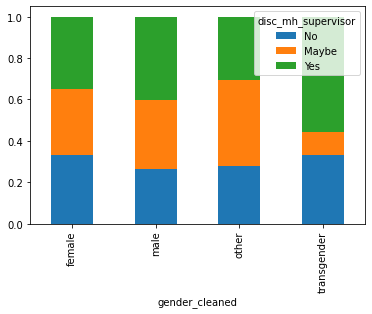

In [13]:
print("Supervisor:")
discussionSup_props.plot(kind = "bar", stacked = True)

Coworker:


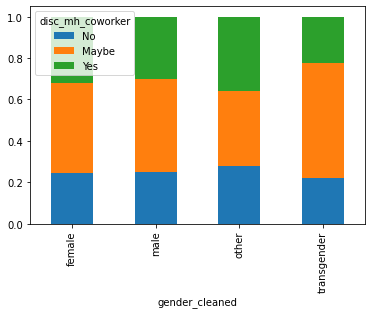

In [14]:
print("Coworker:")
discussionCo_props.plot(kind = "bar", stacked = True)

Age Pivot Tables

In [24]:
discussionSupAge = cd.pivot_table(index = "age_range", columns = "disc_mh_supervisor", aggfunc = "size")
discussionSupAge["Sum"] = discussionSupAge.sum(axis = 1)
print(discussionSupAge, "\n")

discussionSupAge_props = discussionSupAge.loc[:, "Maybe":"Yes"].div(discussionSupAge["Sum"], axis = 0).reindex(columns = ["No", "Maybe", "Yes"])
print(discussionSupAge_props, "\n")

discussionCoAge = cd.pivot_table(index = "age_range", columns = "disc_mh_coworker", aggfunc = "size")
discussionCoAge["Sum"] = discussionCoAge.sum(axis = 1)
print(discussionCoAge, "\n")

discussionCoAge_props = discussionCoAge.loc[:, "Maybe":"Yes"].div(discussionCoAge["Sum"], axis = 0).reindex(columns = ["No", "Maybe", "Yes"])
print(discussionCoAge_props, "\n")

disc_mh_supervisor  Maybe   No  Yes  Sum
age_range                               
(0, 20]                 5    3    2   10
(20, 30]              153  134  164  451
(30, 40]              189  136  235  560
(40, 50]               68   81   84  233
(50, 60]               16   11   17   44
(60, 100]               2    6    1    9 

disc_mh_supervisor        No     Maybe       Yes
age_range                                       
(0, 20]             0.300000  0.500000  0.200000
(20, 30]            0.297118  0.339246  0.363636
(30, 40]            0.242857  0.337500  0.419643
(40, 50]            0.347639  0.291845  0.360515
(50, 60]            0.250000  0.363636  0.386364
(60, 100]           0.666667  0.222222  0.111111 

disc_mh_coworker  Maybe   No  Yes  Sum
age_range                             
(0, 20]               3    4    3   10
(20, 30]            189  119  143  451
(30, 40]            260  117  183  560
(40, 50]             94   70   69  233
(50, 60]             23   12    9   44
(60

Supervisor:


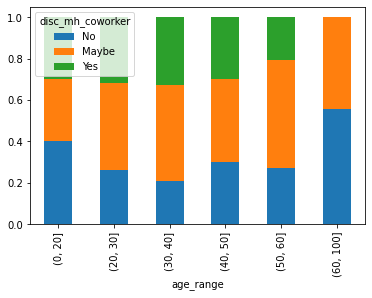

In [27]:
print("Supervisor:")
discussionCoAge_props.plot(kind = "bar", stacked = True)

Coworker:


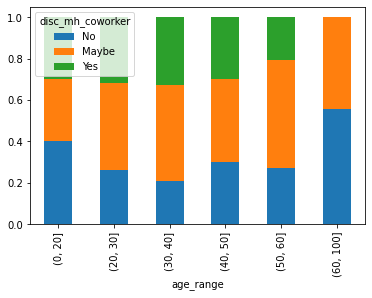

In [26]:
print("Coworker:")
discussionCoAge_props.plot(kind = "bar", stacked = True)

Hypothesis Testing

ACROSS ALL:

H_0: The proportion of people who would feel comfortable talking about mental health with a supervisor is equal to the proportion of people who would feel comfortable talking about mental health with a coworker. 

H_A: The proportion of people who would feel comfortable talking about mental health with a supervisor is not equal to the proportion of people who would feel comfortable talking about mental health with a coworker.


ACROSS GENDER (SUPERVISOR):

H_0: The proportion of men who would feel comfortable talking about mental health with a supervisor is equal to the proportion of women who would feel comfortable talking about mental health with a supervisor.

H_A: The proportion of men who would feel comfortable talking about mental health with a supervisor is not equal to the proportion of women who would feel comfortable talking about mental health with a supervisor.


ACROSS GENDER (COWORKER):

H_0: The proportion of men who would feel comfortable talking about mental health with a coworker is equal to the proportion of women who would feel comfortable talking about mental health with a coworker.

H_A: The proportion of men who would feel comfortable talking about mental health with a coworker is not equal to the proportion of women who would feel comfortable talking about mental health with a coworker.